<h3> LAB 11 - Filtragem Digital 2</h3>
<h5> Processamento Digital de Sinais I - TE352 </h5>
<h5> Leonardo Barbosa da Silva GRR20162855 </h5> 

In [1]:
# Inicializa os pacotes que serão utilizados
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

1) Considere o sinal x a soma de 3 senoides: n=0:128; x = sin(4*pi*n/32) + sin(12*pi*n/32) + sin(20*pi*n/32)

In [2]:
n = np.linspace(0,127,128)
x1 = np.sin(4*np.pi*n/32)
x2 = np.sin(12*np.pi*n/32)
x3 = np.sin(20*np.pi*n/32)
x = x1 + x2 + x3

2) Projete um filtro FIR de ordem 8 para deixar passar somente a senoide central, usando a função fir1().

In [5]:
Wn = 2*np.concatenate((0.1750, 0.2000), axis=None)
w = 2*n*np.pi/128
FIR_b = signal.firwin(8, Wn, pass_zero='bandpass')
w_FIR,FIR = signal.freqz(FIR_b, 1, w)

3) Projete um filtro IIR de ordem 8, semelhante ao anterior, usando a função butter()

In [4]:
IIR_b, IIR_a = signal.butter(4, Wn, btype='bandpass')
w_IIR,IIR = signal.freqz(IIR_b,IIR_a,w)

4) Plote o espectro do sinal X juntamente com as respostas em frequência dos dois filtros.

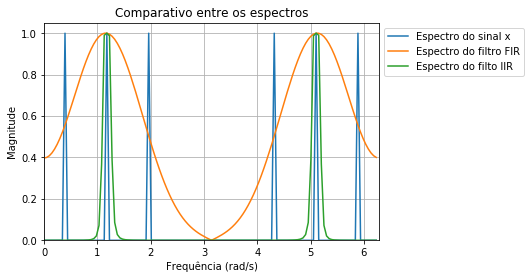

In [110]:
plt.grid(True)
plt.plot(w,abs(np.fft.fft(x))/max(abs(np.fft.fft(x))))
plt.plot(w_FIR,abs(FIR))
plt.plot(w_IIR,abs(IIR))
plt.legend(['Espectro do sinal x', 'Espectro do filtro FIR', 
            'Espectro do filto IIR'],loc='upper left', 
           bbox_to_anchor=(1,1))
plt.title("Comparativo entre os espectros")
plt.ylabel('Magnitude')
plt.xlabel('Frequência (rad/s)')
plt.xlim (0, 2*np.pi)
plt.ylim (0, 1.05)
plt.show()

5) FIltre o sinal pelos dois métodos, e plote no mesmo eixo os dois sinais filtrados.

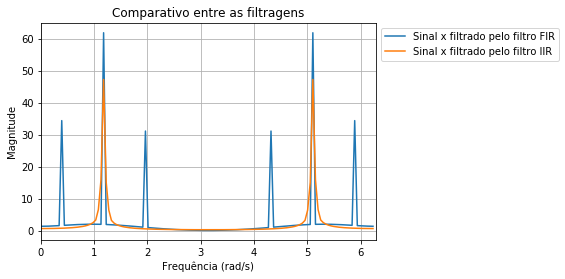

In [111]:
x_filtr_FIR = signal.lfilter(FIR_b, 1, x);
x_filtr_IIR = signal.lfilter(IIR_b, IIR_a, x);


plt.grid(True)
plt.plot(w_FIR, abs(np.fft.fft(x_filtr_FIR)))
plt.plot(w_IIR, abs(np.fft.fft(x_filtr_IIR)))
plt.legend(['Sinal x filtrado pelo filtro FIR', 
            'Sinal x filtrado pelo filtro IIR'],
           loc='upper left', bbox_to_anchor=(1,1))
plt.title("Comparativo entre as filtragens")
plt.ylabel('Magnitude')
plt.xlabel('Frequência (rad/s)')
plt.xlim (0, 2*np.pi)
plt.show()

6) qual dos dois filtros rejeitou melhor as frequencias baixa e alta ?

<b>R:</b> O filtro IIR rejeitou de forma mais eficiente as frequências altas e baixas, visto que somente apresenta um impulso na frequência central. 

7) Plote no mesmo eixo a resposta em frequencia do filtro FIR obtida de duas formas diferentes: a) freqz() b) T.F. da resposta ao impulso. (obs.: lembre que os proprios coeficiente do filtro são a resposta ao impulso)

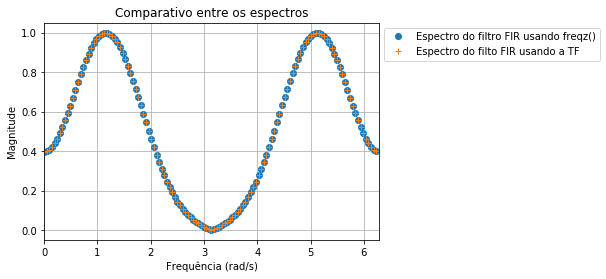

In [103]:
def impz(b,a,l):
    impulse = np.zeros(l, dtype=float)
    impulse[0] =1
    x = np.arange(0,l)
    response = signal.lfilter(b,a,impulse)
    return response

FIR_imp = impz(FIR_b,1,128)

plt.grid(True)
plt.plot(w_FIR,abs(FIR),'o')
plt.plot(w, abs(np.fft.fft(FIR_imp)),'+')
plt.legend(['Espectro do filtro FIR usando freqz()', 
            'Espectro do filto FIR usando a TF'],
           loc='upper left', bbox_to_anchor=(1,1))
plt.title("Comparativo entre os espectros")
plt.ylabel('Magnitude')
plt.xlabel('Frequência (rad/s)')
plt.xlim (0, 2*np.pi)
plt.show()